In [28]:
import numpy as np
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def tanh(x):
    return (np.exp(x) - np.exp(-x))/(np.exp(x) + np.exp(-x))

def relu(x):
    return np.maximum(x,0)

def elu(x,alpha=0.01):
    return np.maximum(x,alpha*(np.exp(x)-1))

def prelu(x,alpha=0.01):
    return np.maximum(x,alpha*x)

def leaky_relu(x,alpha=0.01):
    return np.maximum(x,alpha*x)

def selu(x,lamda=0.01):
    return lamda*elu(x)

def softsign(x):
    return (x)/(1+np.abs(x))

def softplus(x):
    return np.log10(1+np.exp(x))

def hard_sigmoid(x):
    result = np.zeros_like(x)
    result[x >= 2.5] = 1
    result[(x > -2.5) & (x < 2.5)] = 0.2 * x[(x > -2.5) & (x < 2.5)] + 0.5
    return result
    
def swish(x):
    return x*sigmoid(x)

def mish(x):
    return x* tanh(np.log(1+np.exp(x)))

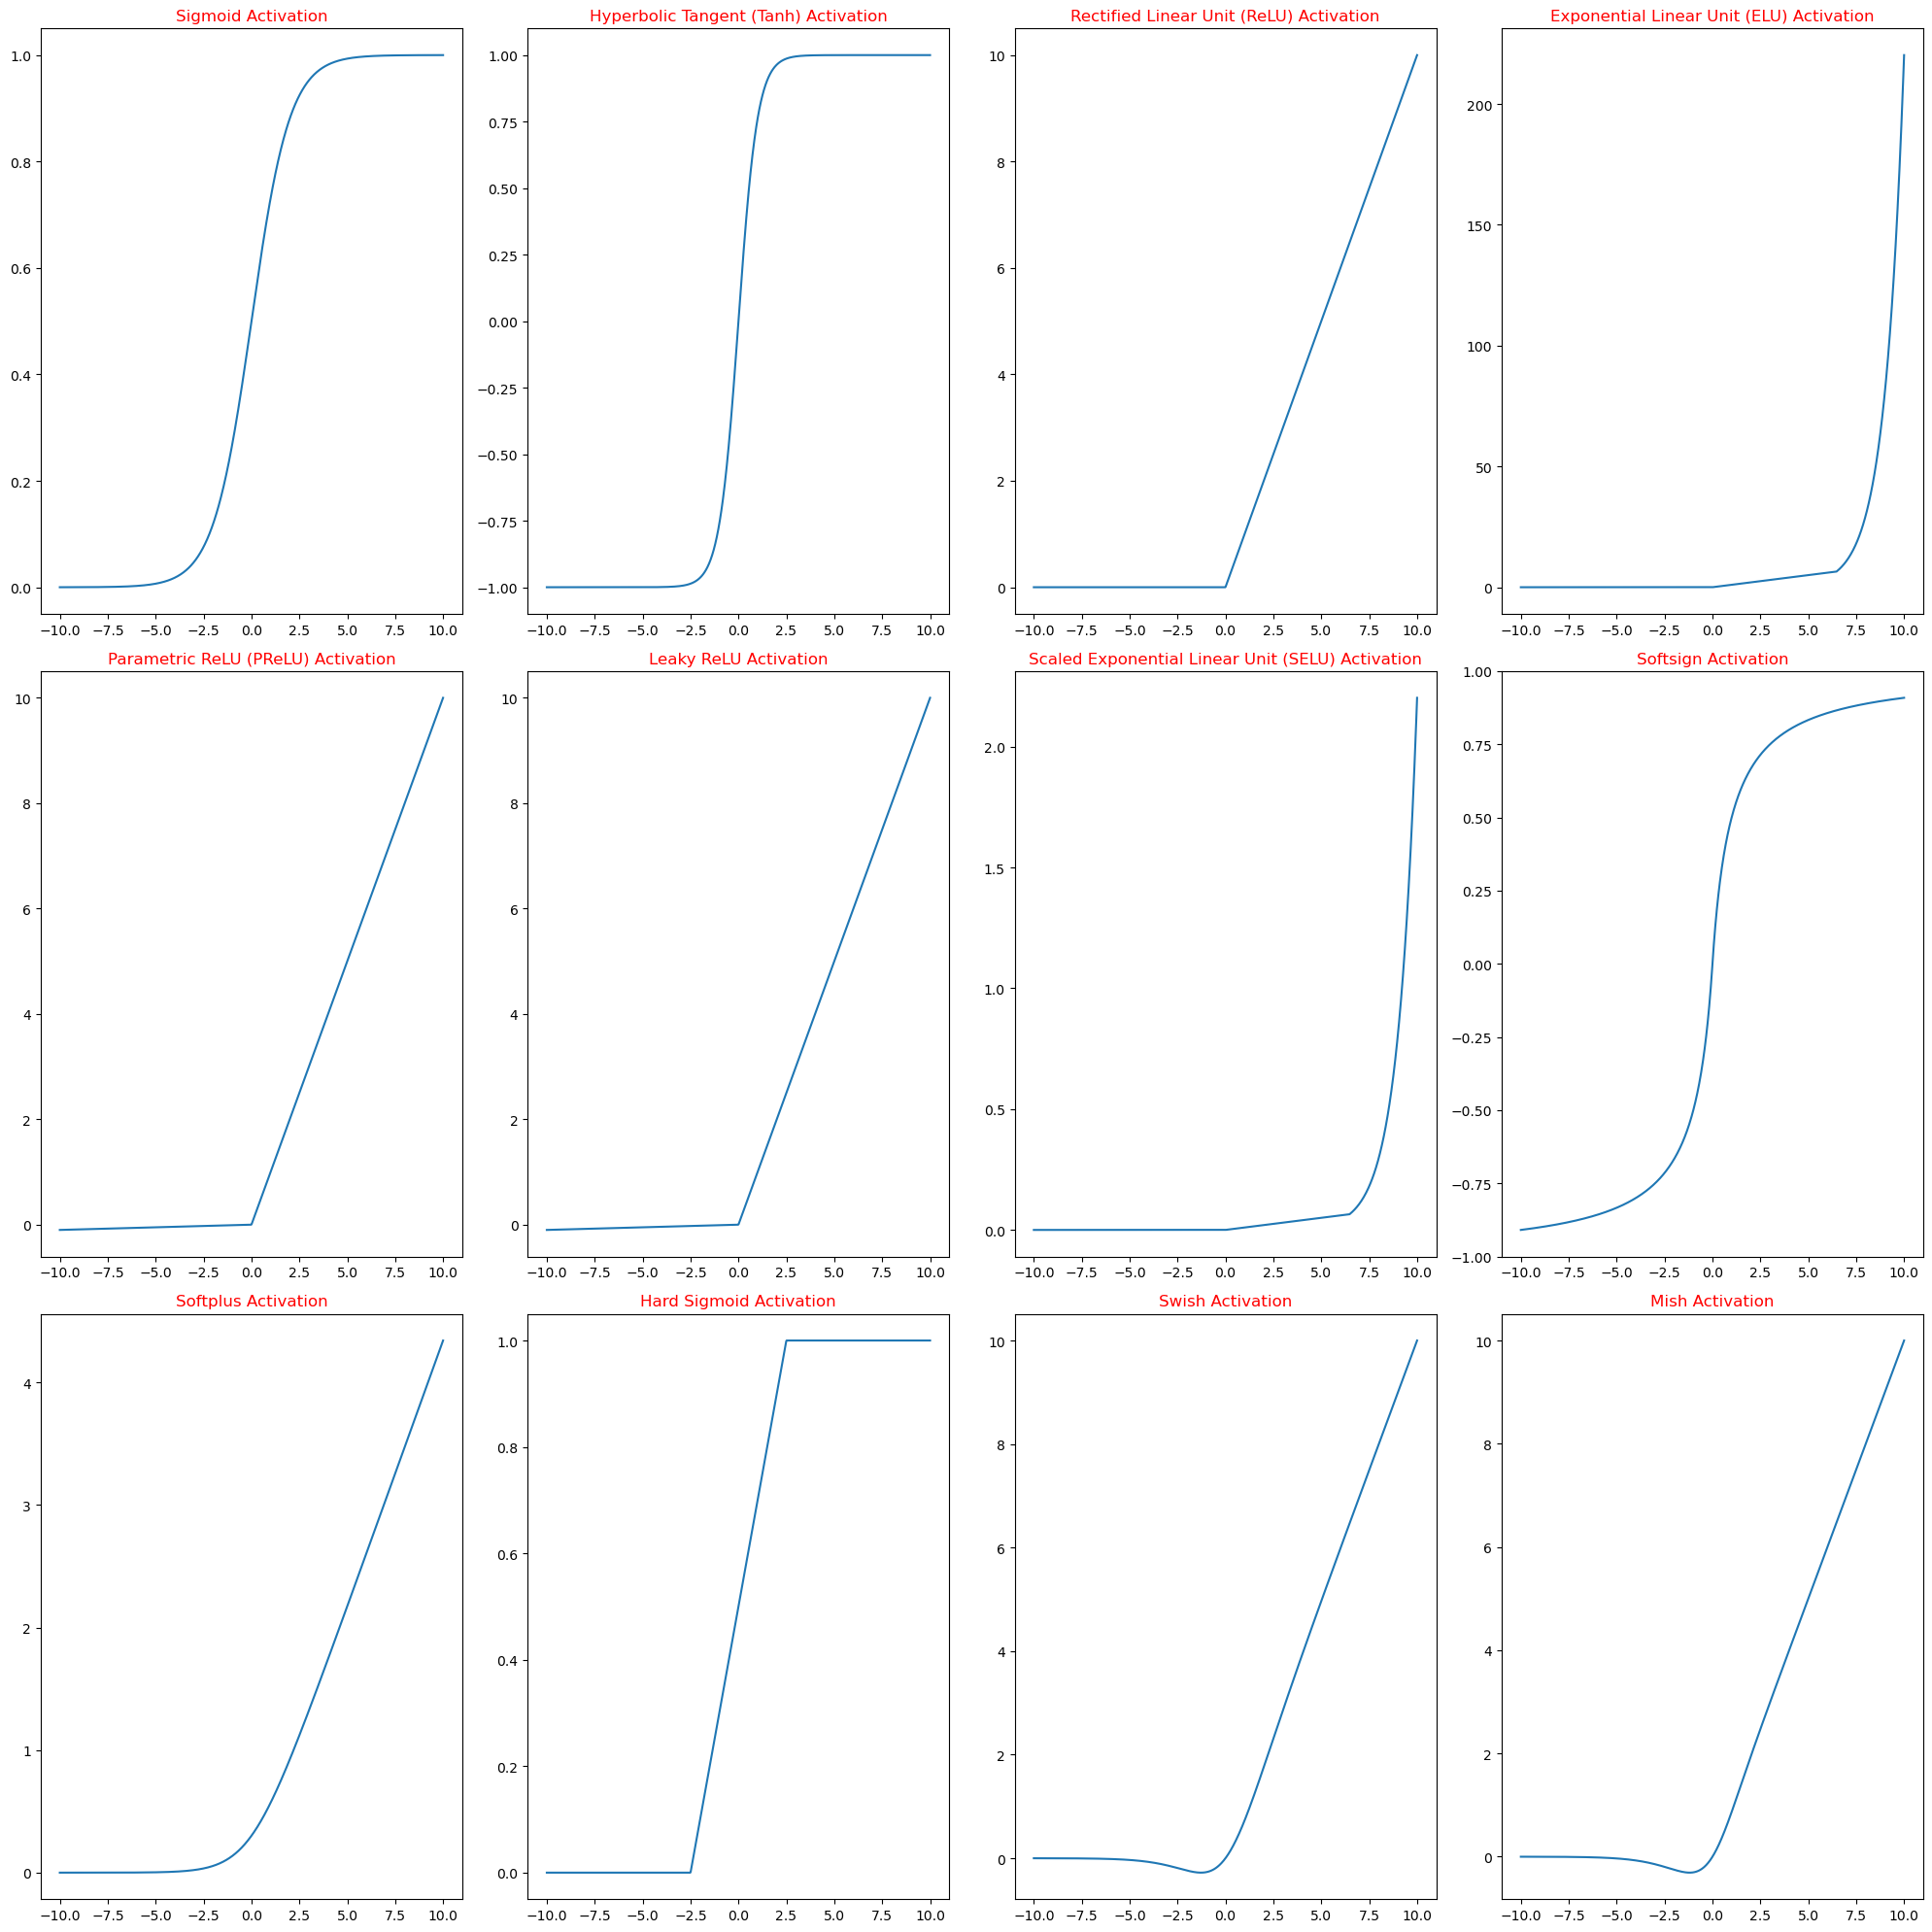

In [30]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming you have defined your activation functions (e.g., sigmoid, tanh, relu, etc.)

x = np.linspace(-10, 10, 1000)

plt.figure(figsize=(20, 20))

plt.subplot(3, 4, 1)
plt.plot(x, sigmoid(x))
plt.title('Sigmoid Activation', color='red')

plt.subplot(3, 4, 2)
plt.plot(x, tanh(x))
plt.title('Hyperbolic Tangent (Tanh) Activation', color='red')

plt.subplot(3, 4, 3)
plt.plot(x, relu(x))
plt.title('Rectified Linear Unit (ReLU) Activation', color='red')

plt.subplot(3, 4, 4)
plt.plot(x, elu(x))
plt.title('Exponential Linear Unit (ELU) Activation', color='red')

plt.subplot(3, 4, 5)
plt.plot(x, prelu(x))
plt.title('Parametric ReLU (PReLU) Activation', color='red')

plt.subplot(3, 4, 6)
plt.plot(x, leaky_relu(x))
plt.title('Leaky ReLU Activation', color='red')

plt.subplot(3, 4, 7)
plt.plot(x, selu(x))
plt.title('Scaled Exponential Linear Unit (SELU) Activation', color='red')

plt.subplot(3, 4, 8)
plt.plot(x, softsign(x))
plt.title('Softsign Activation', color='red')

plt.subplot(3, 4, 9)
plt.plot(x, softplus(x))
plt.title('Softplus Activation', color='red')

plt.subplot(3, 4, 10)
plt.plot(x, hard_sigmoid(x))
plt.title('Hard Sigmoid Activation', color='red')

plt.subplot(3, 4, 11)
plt.plot(x, swish(x))
plt.title('Swish Activation', color='red')

plt.subplot(3, 4, 12)
plt.plot(x, mish(x))
plt.title('Mish Activation', color='red')

plt.tight_layout()
plt.show()


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf

# 1. EDA

In [2]:
dataset = pd.read_csv(r'C:\Users\vickj\OneDrive\Documents\Foundations of data engineering (Mtech)\03_Udemy_DeepLearning\ANN\Dataset\Part 1 - Artificial Neural Networks\Churn_Modelling.csv')

In [3]:
dataset.head(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
Gender_table1 = dataset.pivot_table(index='Gender', values='CustomerId', aggfunc='count')
print(Gender_table1)

        CustomerId
Gender            
Female        4543
Male          5457


In [5]:
Geography_table1 = dataset.pivot_table(index='Geography', values='CustomerId', aggfunc='count')
print(Geography_table1)

           CustomerId
Geography            
France           5014
Germany          2509
Spain            2477


# 2. Data Preprocessing

In [6]:
X = dataset.iloc[:, 3:-1].values
y = dataset.iloc[:, -1].values

# .values will convert dataset values to numpy Array
# iloc means integer location based indexing 

In [7]:
print(X)

[[619 'France' 'Female' ... 1 1 101348.88]
 [608 'Spain' 'Female' ... 0 1 112542.58]
 [502 'France' 'Female' ... 1 0 113931.57]
 ...
 [709 'France' 'Female' ... 0 1 42085.58]
 [772 'Germany' 'Male' ... 1 0 92888.52]
 [792 'France' 'Female' ... 1 0 38190.78]]


In [8]:
#making the gender coloumn binary its also called "Label Encoding"

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X[:, 2] = le.fit_transform(X[:, 2])

In [9]:
#One Hot Encoding the "Geography" column

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [1])], remainder='passthrough')
X = np.array(ct.fit_transform(X))

# Training set and Test set

In [10]:
# Splitting the dataset into the Training set and Test set
split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

# Feature Scaling

In [11]:
# Feature Scaling
def scale_features(X_train, X_test):
    mean = X_train.mean(axis=0)
    std = X_train.std(axis=0)
    X_train_scaled = (X_train - mean) / std
    X_test_scaled = (X_test - mean) / std
    return X_train_scaled, X_test_scaled

# Creating ANN Ant Colony Optimisation

In [13]:
import numpy as np

X_train = X_train.astype(float)
y_train = y_train.astype(float)

class AntColonyOptimizationNN:
    def __init__(self, input_size, hidden_size, output_size, num_ants=10, evaporation_rate=0.5, alpha=1.0, beta=2.0):
        
        self.weights_input_hidden = np.random.randn(input_size, hidden_size)
        self.bias_hidden = np.zeros((1, hidden_size))
        self.weights_hidden_output = np.random.randn(hidden_size, output_size)
        self.bias_output = np.zeros((1, output_size))

        
        self.num_ants = num_ants
        self.pheromones_input_hidden = np.ones_like(self.weights_input_hidden)
        self.pheromones_hidden_output = np.ones_like(self.weights_hidden_output)
        self.evaporation_rate = evaporation_rate
        self.alpha = alpha
        self.beta = beta

    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x.astype(float)))  # Explicitly cast to float

    def forward(self, X):
        # Ensure X is a NumPy array
        X = np.array(X)

        # Forward propagation
        self.hidden_output = self.sigmoid(np.dot(X, self.weights_input_hidden) + self.bias_hidden)
        self.final_output = self.sigmoid(np.dot(self.hidden_output, self.weights_hidden_output) + self.bias_output)
        return self.final_output

    def calculate_fitness(self, X, y):
        
        predictions = self.forward(X)
        error = y - predictions
        return 1 / np.mean(np.square(error))

    def update_pheromones(self, X, y):
        
        for ant in range(self.num_ants):
            
            perturbation_input_hidden = np.random.randn(*self.weights_input_hidden.shape)
            perturbation_hidden_output = np.random.randn(*self.weights_hidden_output.shape)

            
            weights_input_hidden_candidate = self.weights_input_hidden + perturbation_input_hidden
            weights_hidden_output_candidate = self.weights_hidden_output + perturbation_hidden_output

            
            fitness_candidate = self.calculate_fitness(X, y)

            
            self.pheromones_input_hidden += fitness_candidate * perturbation_input_hidden
            self.pheromones_hidden_output += fitness_candidate * perturbation_hidden_output

    def train(self, X, y, epochs):
        for epoch in range(epochs):
            # Update pheromones
            self.update_pheromones(X, y)

            # Update weights based on pheromones
            self.weights_input_hidden += self.alpha * self.pheromones_input_hidden
            self.weights_hidden_output += self.beta * self.pheromones_hidden_output

            # Forward and backward for each epoch
            output = self.forward(X)

            # Print loss for every 100 epochs
            if epoch % 100 == 0:
                loss = np.mean(np.square(y - output))
                print(f"Epoch {epoch}, Loss: {loss}")

    def predict(self, X):
        # Make predictions
        return self.forward(X)



input_size = X_train.shape[1]
hidden_size = 6
output_size = 1


aco_nn = AntColonyOptimizationNN(input_size, hidden_size, output_size, num_ants=20, evaporation_rate=0.5, alpha=1.0, beta=2.0)


aco_nn.train(X_train, y_train.reshape(-1, 1), epochs=1000)


predictions_aco = aco_nn.predict(X_test)


threshold_aco = 0.5
binary_predictions_aco = (predictions_aco > threshold_aco).astype(int)

# Evaluate accuracy or other metrics
accuracy_aco = np.mean(binary_predictions_aco == y_test.reshape(-1, 1))
print(f"ACO-Based NN Accuracy: {accuracy_aco}")


C:\Users\vickj\AppData\Local\Temp\ipykernel_8116\1821278990.py:23: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x.astype(float)))  # Explicitly cast to float


Epoch 0, Loss: 0.205874989968562
Epoch 100, Loss: 0.79225
Epoch 200, Loss: 0.7935
Epoch 300, Loss: 0.794125
Epoch 400, Loss: 0.794125
Epoch 500, Loss: 0.7855
Epoch 600, Loss: 0.78275
Epoch 700, Loss: 0.779625
Epoch 800, Loss: 0.738
Epoch 900, Loss: 0.205875
ACO-Based NN Accuracy: 0.805


# Predicting the Test set results

In [18]:
print(aco_nn.predict(np.array([[1, 0, 0, 600, 1, 40, 3, 60000, 2, 1, 1, 50000]])) > 0.5)

[[False]]


C:\Users\vickj\AppData\Local\Temp\ipykernel_8116\1821278990.py:23: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x.astype(float)))  # Explicitly cast to float


# Creating ANN Particle swarm optimization

In [21]:
# Splitting the dataset into the Training set and Test set
split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

In [25]:
class ParticleSwarmOptimizationNN:
    def __init__(self, input_size, hidden_size, output_size, num_particles=10, inertia=0.5, cognitive_factor=1.5, social_factor=1.5):
        # Initialize weights and biases
        self.weights_input_hidden = np.random.randn(input_size, hidden_size)
        self.bias_hidden = np.zeros((1, hidden_size))
        self.weights_hidden_output = np.random.randn(hidden_size, output_size)
        self.bias_output = np.zeros((1, output_size))

        # PSO parameters
        self.num_particles = num_particles
        self.particles_input_hidden = np.random.randn(num_particles, *self.weights_input_hidden.shape)
        self.particles_hidden_output = np.random.randn(num_particles, *self.weights_hidden_output.shape)
        self.best_positions_input_hidden = self.particles_input_hidden.copy()
        self.best_positions_hidden_output = self.particles_hidden_output.copy()
        self.best_fitness = np.zeros(num_particles)
        self.inertia = inertia
        self.cognitive_factor = cognitive_factor
        self.social_factor = social_factor

    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x.astype(float)))

    def forward(self, X):
        X = np.array(X)
        self.hidden_output = self.sigmoid(np.dot(X, self.weights_input_hidden) + self.bias_hidden)
        self.final_output = self.sigmoid(np.dot(self.hidden_output, self.weights_hidden_output) + self.bias_output)
        return self.final_output

    def calculate_fitness(self, X, y):
        predictions = self.forward(X)
        error = y - predictions
        return 1 / np.mean(np.square(error))

    def update_weights(self, X, y):
        for particle in range(self.num_particles):
            # Update particle positions
            self.particles_input_hidden[particle] = self.inertia * self.particles_input_hidden[particle] + \
                self.cognitive_factor * np.random.rand() * (self.best_positions_input_hidden[particle] - self.particles_input_hidden[particle]) + \
                self.social_factor * np.random.rand() * (self.best_positions_input_hidden[self.best_fitness.argmax()] - self.particles_input_hidden[particle])

            self.particles_hidden_output[particle] = self.inertia * self.particles_hidden_output[particle] + \
                self.cognitive_factor * np.random.rand() * (self.best_positions_hidden_output[particle] - self.particles_hidden_output[particle]) + \
                self.social_factor * np.random.rand() * (self.best_positions_hidden_output[self.best_fitness.argmax()] - self.particles_hidden_output[particle])

            # Evaluate fitness of the updated particle position
            fitness_particle = self.calculate_fitness(X, y)

            # Update personal best if improved
            if fitness_particle > self.best_fitness[particle]:
                self.best_positions_input_hidden[particle] = self.particles_input_hidden[particle].copy()
                self.best_positions_hidden_output[particle] = self.particles_hidden_output[particle].copy()
                self.best_fitness[particle] = fitness_particle

        # Update weights based on the best positions
        self.weights_input_hidden += self.best_positions_input_hidden[self.best_fitness.argmax()]
        self.weights_hidden_output += self.best_positions_hidden_output[self.best_fitness.argmax()]

    def train(self, X, y, epochs):
        for epoch in range(epochs):
            
            self.update_weights(X, y)

            
            output = self.forward(X)

            
            if epoch % 100 == 0:
                loss = np.mean(np.square(y - output))
                print(f"Epoch {epoch}, Loss: {loss}")

    def predict(self, X):
        return self.forward(X)

input_size = X_train.shape[1]
hidden_size = 6
output_size = 1

pso_nn = ParticleSwarmOptimizationNN(input_size, hidden_size, output_size, num_particles=20, inertia=0.5, cognitive_factor=1.5, social_factor=1.5)

pso_nn.train(X_train, y_train.reshape(-1, 1), epochs=1000)


C:\Users\vickj\AppData\Local\Temp\ipykernel_8116\85021211.py:21: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x.astype(float)))


Epoch 0, Loss: 0.21806702465271816
Epoch 100, Loss: 0.7930521950536906
Epoch 200, Loss: 0.7933749297693661
Epoch 300, Loss: 0.79337499998469
Epoch 400, Loss: 0.7933749999999967
Epoch 500, Loss: 0.793375
Epoch 600, Loss: 0.793375
Epoch 700, Loss: 0.793375
Epoch 800, Loss: 0.793375
Epoch 900, Loss: 0.793375


In [27]:
predictions_pso = pso_nn.predict(X_test)
threshold_pso = 0.5
binary_predictions_pso = (predictions_pso > threshold_pso).astype(int)

accuracy_pso = np.mean(binary_predictions_pso == y_test.reshape(-1, 1))
print(f"PSO-Based NN Accuracy: {accuracy_pso}")


PSO-Based NN Accuracy: 0.1965


C:\Users\vickj\AppData\Local\Temp\ipykernel_8116\85021211.py:21: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x.astype(float)))


# Creating ANN Grey Wolf optimization

In [ ]:
# Splitting the dataset into the Training set and Test set
split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

In [32]:
import numpy as np

class GreyWolfOptimizationNN:
    def __init__(self, input_size, hidden_size, output_size, num_wolves=10, alpha=2.0, beta=2.0, delta=2.0, epochs=1000):
        # Initialize weights and biases
        self.weights_input_hidden = np.random.randn(input_size, hidden_size)
        self.bias_hidden = np.zeros((1, hidden_size))
        self.weights_hidden_output = np.random.randn(hidden_size, output_size)
        self.bias_output = np.zeros((1, output_size))

        # GWO parameters
        self.num_wolves = num_wolves
        self.alpha = alpha
        self.beta = beta
        self.delta = delta
        self.epochs = epochs

    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x.astype(float)))  # Explicitly cast to float

    def forward(self, X):
        # Ensure X is a NumPy array
        X = np.array(X)

        # Forward propagation
        self.hidden_output = self.sigmoid(np.dot(X, self.weights_input_hidden) + self.bias_hidden)
        self.final_output = self.sigmoid(np.dot(self.hidden_output, self.weights_hidden_output) + self.bias_output)
        return self.final_output

    def calculate_fitness(self, X, y):
        # Calculate fitness as the inverse of the mean squared error
        predictions = self.forward(X)
        error = y - predictions
        return 1 / np.mean(np.square(error))

    def update_wolf_positions(self, X, y):
        for epoch in range(self.epochs):
            # Update wolf positions
            a = 2 - epoch * (2 / self.epochs)  # Decreasing alpha from 2 to 0

            for wolf in range(self.num_wolves):
                # Random search for alpha, beta, and delta wolves
                if np.random.rand() < 0.5:
                    self.weights_input_hidden += a * 0.01 * np.random.randn(*self.weights_input_hidden.shape)  # Adjust the scaling factor
                    self.weights_hidden_output += a * 0.01 * np.random.randn(*self.weights_hidden_output.shape)
                else:
                    C1 = 2 * np.random.rand()  
                    C2 = 2 * np.random.rand()  
                    C3 = 2 * np.random.rand()  

                    # Update alpha wolf position
                    D_alpha = np.abs(C1 * self.weights_input_hidden - self.weights_input_hidden)
                    self.weights_input_hidden = self.weights_input_hidden - a * 0.01 * D_alpha  

                    D_alpha = np.abs(C1 * self.weights_hidden_output - self.weights_hidden_output)
                    self.weights_hidden_output = self.weights_hidden_output - a * 0.01 * D_alpha  

                    # Update beta wolf position
                    D_beta = np.abs(C2 * self.weights_input_hidden - self.weights_input_hidden)
                    self.weights_input_hidden = self.weights_input_hidden - a * 0.01 * D_beta  

                    D_beta = np.abs(C2 * self.weights_hidden_output - self.weights_hidden_output)
                    self.weights_hidden_output = self.weights_hidden_output - a * 0.01 * D_beta  

                    # Update delta wolf position
                    D_delta = np.abs(C3 * self.weights_input_hidden - self.weights_input_hidden)
                    self.weights_input_hidden = self.weights_input_hidden - a * 0.01 * D_delta  

                    D_delta = np.abs(C3 * self.weights_hidden_output - self.weights_hidden_output)
                    self.weights_hidden_output = self.weights_hidden_output - a * 0.01 * D_delta  

            
            output = self.forward(X)

            # Print loss for every 100 epochs
            if epoch % 100 == 0:
                loss = np.mean(np.square(y - output))
                print(f"Epoch {epoch}, Loss: {loss}")

    def train(self, X, y):
        # Update wolf positions
        self.update_wolf_positions(X, y)

    def predict(self, X):
        # Make predictions
        return self.forward(X)



input_size = X_train.shape[1]
hidden_size = 6
output_size = 1


gwo_nn = GreyWolfOptimizationNN(input_size, hidden_size, output_size, num_wolves=10, alpha=2.0, beta=2.0, delta=2.0, epochs=1000)


gwo_nn.train(X_train, y_train.reshape(-1, 1))


predictions_gwo = gwo_nn.predict(X_test)


threshold_gwo = 0.5
binary_predictions_gwo = (predictions_gwo > threshold_gwo).astype(int)


accuracy_gwo = np.mean(binary_predictions_gwo == y_test.reshape(-1, 1))
print(f"GWO-Based NN Accuracy: {accuracy_gwo}")


C:\Users\vickj\AppData\Local\Temp\ipykernel_8116\3820462141.py:19: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x.astype(float)))  # Explicitly cast to float


Epoch 0, Loss: 0.18696003217991947
Epoch 100, Loss: 0.25
Epoch 200, Loss: 0.25
Epoch 300, Loss: 0.25
Epoch 400, Loss: 0.25
Epoch 500, Loss: 0.25
Epoch 600, Loss: 0.25
Epoch 700, Loss: 0.25
Epoch 800, Loss: 0.25
Epoch 900, Loss: 0.25
GWO-Based NN Accuracy: 0.805


# Predicting the Test set results

In [36]:

# New input for prediction
new_input = np.array([[1, 0, 0, 600, 1, 40, 3, 60000, 2, 1, 1, 50000]])

# Make predictions
predictions_gwo = gwo_nn.predict(new_input)

# Threshold predictions (assuming binary classification)
threshold_gwo = 0.5
binary_predictions_gwo = (predictions_gwo > threshold_gwo)

# Print the result as True or False
print(binary_predictions_gwo[0])


[False]


C:\Users\vickj\AppData\Local\Temp\ipykernel_8116\3820462141.py:19: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x.astype(float)))  # Explicitly cast to float
